In [1]:
import numpy as np
from os import path
import matplotlib.pyplot as plt





32500
32500
32499
32499
32499


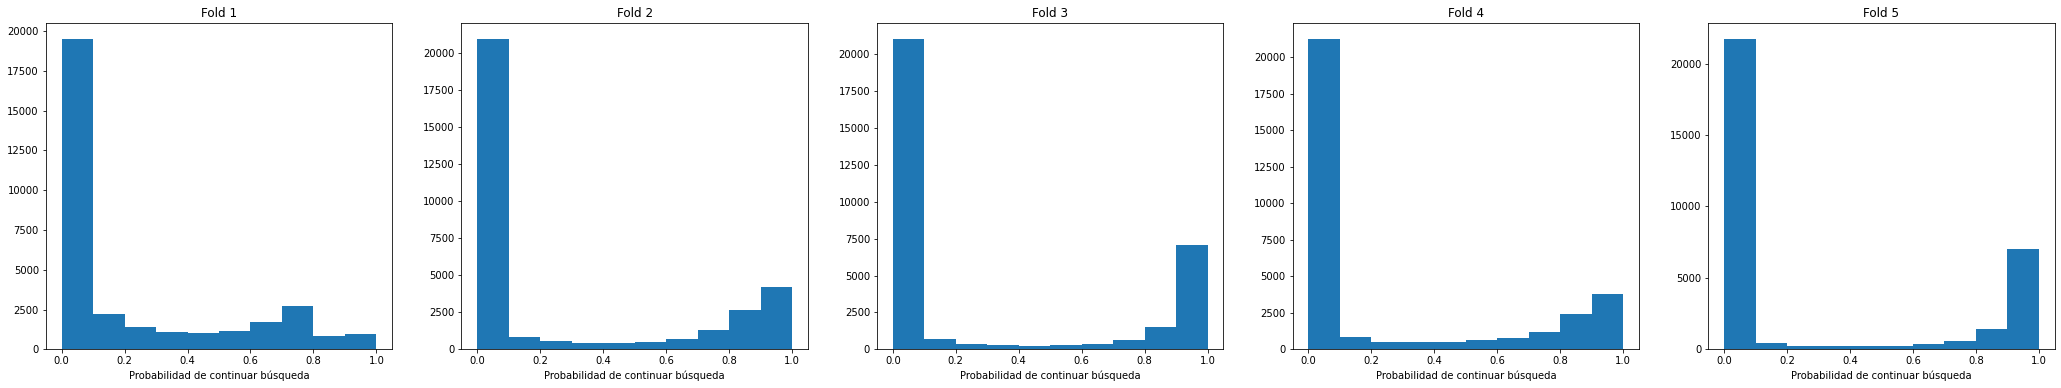

In [2]:
#distribuciones generales
fig, ax = plt.subplots(1, 5, figsize = (36,6))
for i in range(1,6):
    outputs = np.load(path.abspath(f"gng-outputs-{i}.npz"))["outputs"]
    outputs = outputs[int(outputs.shape[0]/2):]
    ax[i-1].hist(outputs)
    ax[i-1].set_title(f"Fold {i}")
    ax[i-1].set_xlabel("Probabilidad de continuar búsqueda")
    


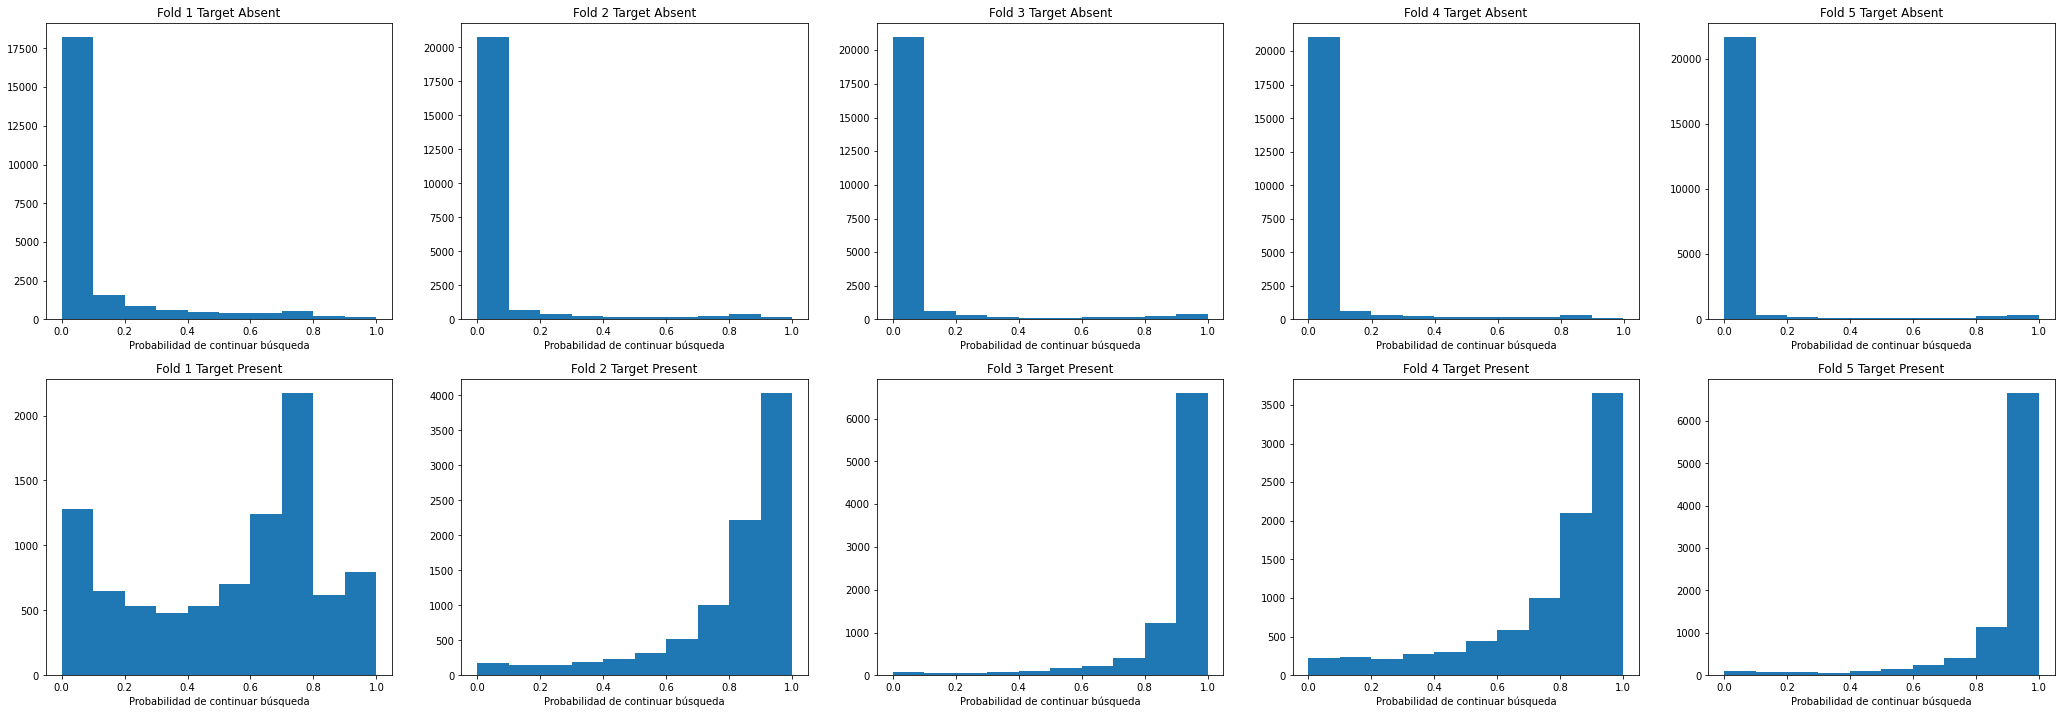

In [4]:
#distribuciones por label
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    tp_labels_indexes = np.where(labels == 1)[0]
    ta_labels_indexes = np.where(labels == 0)[0]
    ta_outputs = outputs[ta_labels_indexes]
    tp_outputs = outputs[tp_labels_indexes]
    ax[0][i-1].hist(ta_outputs)
    ax[0][i-1].set_title(f"Fold {i} Target Absent")
    ax[0][i-1].set_xlabel("Probabilidad de continuar búsqueda")
    ax[1][i-1].hist(tp_outputs)
    ax[1][i-1].set_title(f"Fold {i} Target Present")
    ax[1][i-1].set_xlabel("Probabilidad de continuar búsqueda")

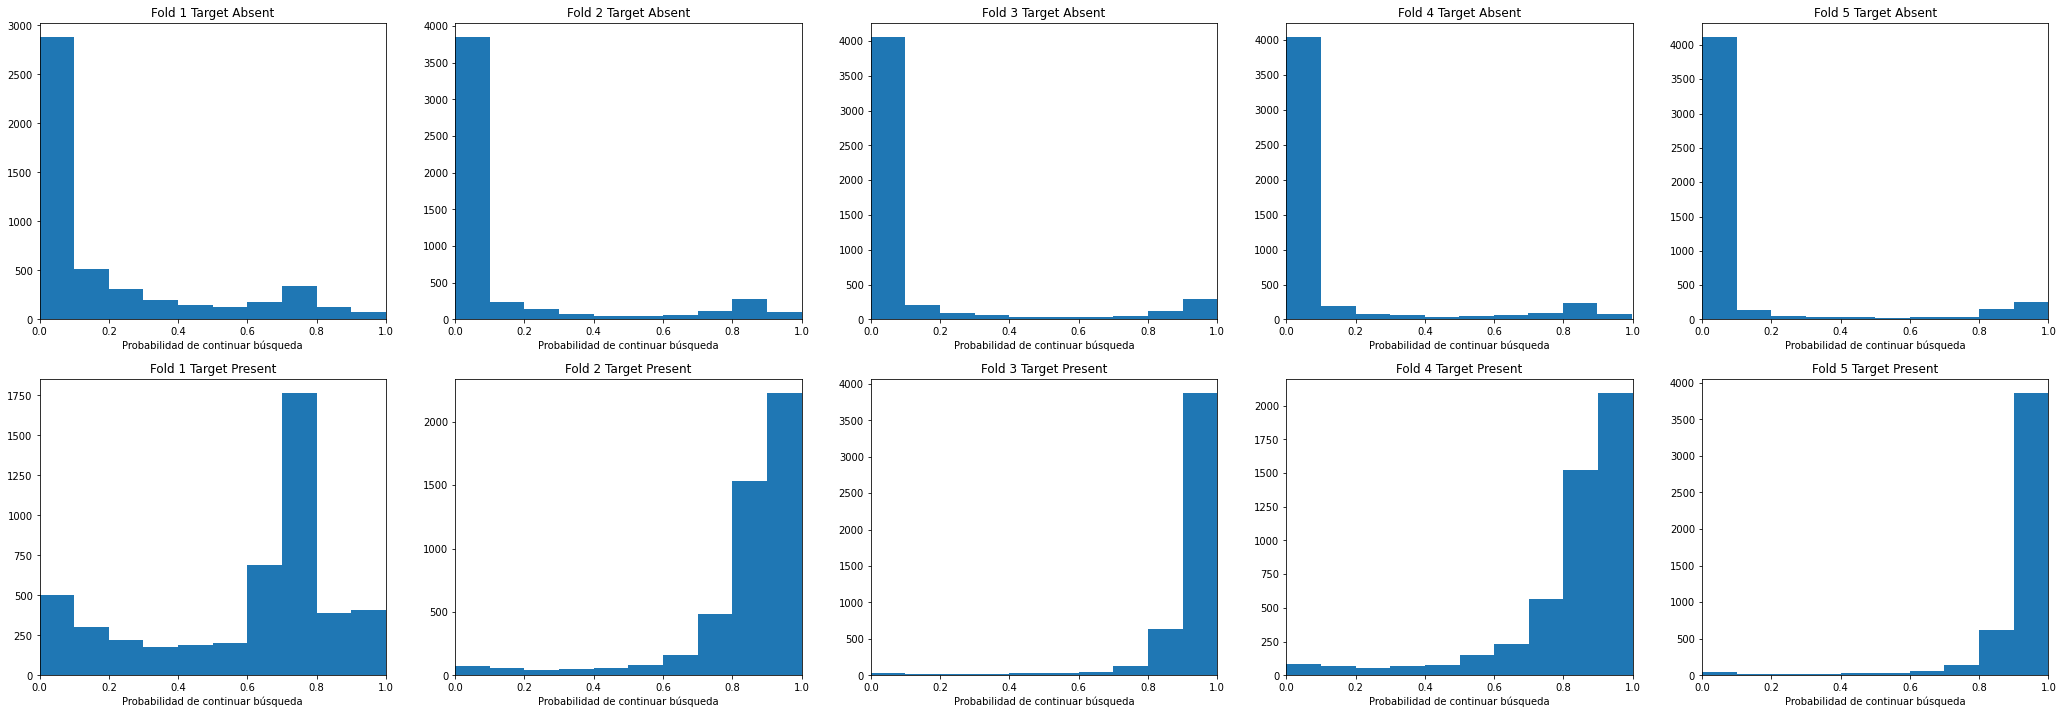

In [26]:
#distribuciones por número de fijación
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    fixations = dict["fixations"]
    fixations = fixations[int(fixations.shape[0]/2):]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    fixation_indexes = np.where(fixations == 1)[0]     
    tp_labels_indexes = np.where(labels == 1)[0]
    ta_labels_indexes = np.where(labels == 0)[0]
    tp_labels_indexes = np.intersect1d(tp_labels_indexes,fixation_indexes)
    ta_labels_indexes = np.intersect1d(ta_labels_indexes,fixation_indexes)    
    ta_outputs = outputs[ta_labels_indexes]
    tp_outputs = outputs[tp_labels_indexes]    
    ax[0][i-1].hist(ta_outputs)
    ax[0][i-1].set_title(f"Fold {i} Target Absent")
    ax[0][i-1].set_xlabel("Probabilidad de continuar búsqueda")
    ax[0][i-1].set_xlim(0,1)
    ax[1][i-1].hist(tp_outputs)
    ax[1][i-1].set_xlim(0,1)
    ax[1][i-1].set_title(f"Fold {i} Target Present")
    ax[1][i-1].set_xlabel("Probabilidad de continuar búsqueda")